In [4]:
import pymongo
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output


In [11]:
# Conexión a la base de datos
client = pymongo.MongoClient('mongodb://localhost:27017/')

#Definición de la BD y la colección de donde se leerán los datos
base = client["Geodat"]
col = base["Geojsn"]

#second_col es la colección donde guardaremos los datos ya limpios
second_col=base["Geojsn2"]

third_col=base["Geojsn3"]

In [12]:
#Definición de las delegaciones que necesitamos

delegacion = ["ALVARO OBREGON","AZCAPOTZALCO","BENITO JUAREZ","COYOACAN","CUAJIMALPA","CUAUHTEMOC","GUSTAVO A. MADERO","IZTACALCO","IZTAPALAPA", "LA MAGDALENA CONTRERAS","MIGUEL HIDALGO","MILPA ALTA","TLAHUAC","TLALPAN","VENUSTIANO CARRANZA","XOCHIMILCO"]

In [13]:
#Query para filtrar solo los datos de las delegaciones que necesitamos

query = {"properties.alcaldia_hechos" : {'$nin': delegacion}}

In [14]:
#Query para eliminar los datos que contengan delegaciones que no necesitamos

col.remove(query)

C:\Users\Mauricio\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  This is separate from the ipykernel package so we can avoid doing imports until


{'n': 0, 'ok': 1.0}

In [15]:
#Query para eliminar el id de los diccionarios

datos_sucios = [x for x in col.find({}, {'_id': False})] 

In [16]:
#Iterar para seleccionar los keys que necesitamos. El archivo json sólo conservará las llaves que agreguemos en las variables k

datos_limpios=[]

for x in range(0,len(datos_sucios)):
    idatos_sucios = datos_sucios[x]
    idatos_sucios["properties"]= {k: v for k, v in idatos_sucios["properties"].items() if k=="alcaldia_hechos" or k=="ao_hechos" or k=="colonia_hechos" or k=="geopoint" or k=="mes_inicio" or k=="fecha_inicio" or k=="categoria_delito" or k=="delito" or k=="latitud" or k=="longitud"}
    datos_limpios.append(idatos_sucios)

In [19]:
#Insertamos los datos limpios en la colección Geojsn2

second_col.insert(datos_limpios)

C:\Users\Mauricio\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  This is separate from the ipykernel package so we can avoid doing imports until


[ObjectId('5e2a90587554b6fead6d846a'),
 ObjectId('5e2a90587554b6fead6d846b'),
 ObjectId('5e2a90587554b6fead6d846c'),
 ObjectId('5e2a90587554b6fead6d846d'),
 ObjectId('5e2a90587554b6fead6d846e'),
 ObjectId('5e2a90587554b6fead6d846f'),
 ObjectId('5e2a90587554b6fead6d8470'),
 ObjectId('5e2a90587554b6fead6d8471'),
 ObjectId('5e2a90587554b6fead6d8472'),
 ObjectId('5e2a90587554b6fead6d8473'),
 ObjectId('5e2a90587554b6fead6d8474'),
 ObjectId('5e2a90587554b6fead6d8475'),
 ObjectId('5e2a90587554b6fead6d8476'),
 ObjectId('5e2a90587554b6fead6d8477'),
 ObjectId('5e2a90587554b6fead6d8478'),
 ObjectId('5e2a90587554b6fead6d8479'),
 ObjectId('5e2a90587554b6fead6d847a'),
 ObjectId('5e2a90587554b6fead6d847b'),
 ObjectId('5e2a90587554b6fead6d847c'),
 ObjectId('5e2a90587554b6fead6d847d'),
 ObjectId('5e2a90587554b6fead6d847e'),
 ObjectId('5e2a90587554b6fead6d847f'),
 ObjectId('5e2a90587554b6fead6d8480'),
 ObjectId('5e2a90587554b6fead6d8481'),
 ObjectId('5e2a90587554b6fead6d8482'),
 ObjectId('5e2a90587554b6

## Diccionarios para Flask

In [20]:
list_jsons  = [x for x in second_col.find({},{"_id":False})]

In [21]:
Delitos_DF=pd.DataFrame(list_jsons)

In [22]:
Delitos_DF["tipoDelito"]=Delitos_DF.properties.map(lambda x: x["delito"])

In [23]:
Delitos_DF["Delegacion"]=Delitos_DF.properties.map(lambda x: x["alcaldia_hechos"])

In [24]:
Delitos_DF["Latitud"]=Delitos_DF.properties.map(lambda x : x["latitud"])

In [25]:
Delitos_DF["longitud"]=Delitos_DF.properties.map(lambda x : x["longitud"])

In [26]:
Delitos_DF["Año"]=Delitos_DF.properties.map(lambda x : x["ao_hechos"])

In [49]:
Crime=Delitos_DF["Delegacion"].value_counts()


In [50]:
# Crime=Crime.apply(pd.to_numeric)
Crime=Crime.to_frame()

In [33]:
Crime["Delegacion"]=int(Crime["Delegacion"].iloc[i])

NameError: name 'i' is not defined

In [51]:
Crime=Crime.rename(columns={"Delegacion":"Count"})
Crime=Crime.reset_index()

In [36]:
Crime["Count"]

0     294096
1     273110
2     157632
3     121918
4     121002
5     120456
6     104994
7     104414
8      87622
9      76902
10     55410
11     41756
12     27418
13     11798
Name: Count, dtype: int64

In [52]:
Crime=Crime.rename(columns={"index":"Delegacion"})

In [53]:
counts=[]
for i in range(Crime.shape[0]):
    counts.append(Crime.iloc[i].to_json())

In [ ]:
Aos=Delitos_DF["Año"].value_counts()

In [ ]:
Tipo=Delitos_DF["tipoDelito"].value_counts()

In [43]:
Geopoint=Delitos_DF[["Latitud","longitud","tipoDelito","Delegacion"]]

In [ ]:
crimenToPlot = Crime.to_dict()

In [45]:
crimejson=[]
for i in range(Geopoint.shape[0]):
     crimejson.append(Geopoint.iloc[i].to_dict())

In [ ]:
criPlot =[]
for i in range(Crime_DF.shape[0]):
        criPlot.append(Crime_DF.iloc[i].to_dict())

## Scraping Twitter

b'Skipping line 4: expected 2 fields, saw 3\nSkipping line 36: expected 2 fields, saw 4\nSkipping line 39: expected 2 fields, saw 4\nSkipping line 40: expected 2 fields, saw 4\nSkipping line 43: expected 2 fields, saw 4\nSkipping line 47: expected 2 fields, saw 4\nSkipping line 48: expected 2 fields, saw 4\nSkipping line 50: expected 2 fields, saw 4\nSkipping line 51: expected 2 fields, saw 4\nSkipping line 52: expected 2 fields, saw 4\nSkipping line 53: expected 2 fields, saw 4\nSkipping line 54: expected 2 fields, saw 4\nSkipping line 55: expected 2 fields, saw 4\nSkipping line 57: expected 2 fields, saw 3\nSkipping line 80: expected 2 fields, saw 3\nSkipping line 82: expected 2 fields, saw 5\nSkipping line 83: expected 2 fields, saw 3\nSkipping line 102: expected 2 fields, saw 3\nSkipping line 119: expected 2 fields, saw 3\nSkipping line 123: expected 2 fields, saw 3\nSkipping line 126: expected 2 fields, saw 3\nSkipping line 127: expected 2 fields, saw 3\nSkipping line 132: expecte

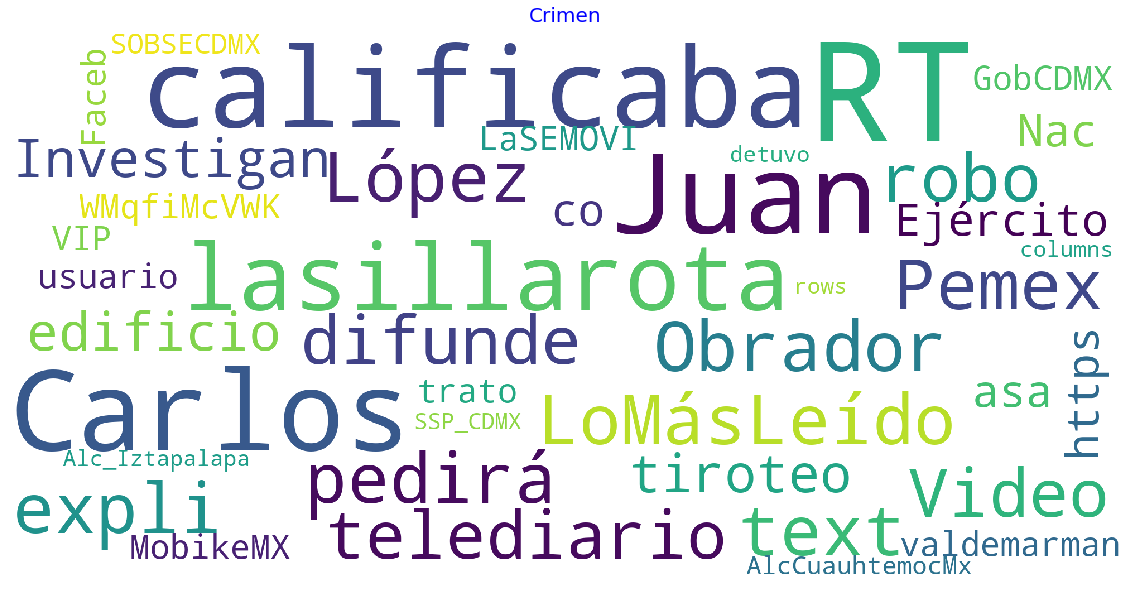

In [59]:
data = pd.read_csv('./tweetsCrimeCDMX.csv',error_bad_lines=False)
# Keeping only the neccessary columns
data = data[['text']]
stop_words_sp = set(stopwords.words('spanish'))
def generateWordCloud(data,title):
        wordcloud = WordCloud(background_color='white',
        stopwords=stop_words_sp,
        max_words=300,
        max_font_size=50, 
        scale=5,
        random_state=42).generate(str(data))
        wordcloud.recolor(random_state=42)
        plt.figure(figsize=(20, 15))
        plt.title(title, fontsize=20,color='blue')
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.savefig("plot.jpg")
        plt.show()

generateWordCloud(data,'Crimen')

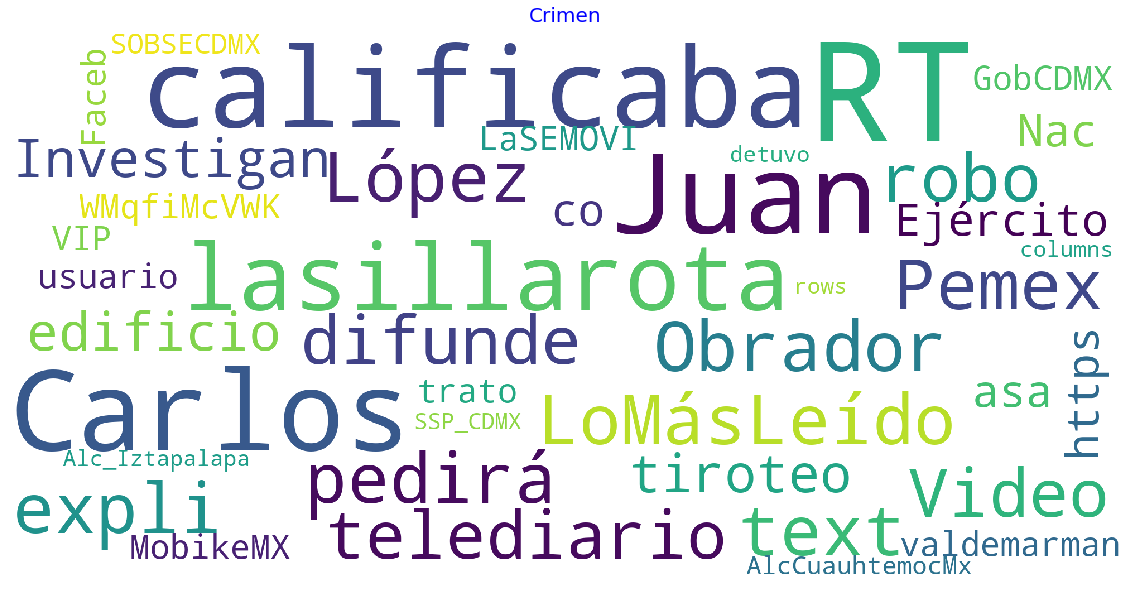